In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [4]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [7]:
annot = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/B_cell_lymphoma_24/quantification/cells_annotation.csv')
exp = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/B_cell_lymphoma_24/quantification/cells_expression.csv')

In [4]:
annot

,unique_cell_id,x,y,unique_region,PatientID,Merged_final
0,191_1_1_1,8906,48,191_1reg001,LN0014,B
1,191_1_1_3,2791,4347,191_1reg001,LN0014,B
2,191_1_1_6,934,2566,191_1reg001,LN0014,FDC
3,191_1_1_7,8389,2240,191_1reg001,LN0014,B
4,191_1_1_8,4147,1312,191_1reg001,LN0014,B
...,...,...,...,...,...,...
5690279,191_5_4_182277,5403,6658,191_5reg004,LN0273,Macro
5690280,191_5_4_182278,3959,6402,191_5reg004,LN0273,Stromal cells
5690281,191_5_4_182279,3886,6269,191_5reg004,LN0273,B
5690282,191_5_4_182280,5670,6830,191_5reg004,LN0273,B


In [5]:
exp

,Unnamed: 0,BCL6,GATA3,CXCR5,Tbet,CD62L,TIM3,CD134,IL10,CTLA4,...,CD11c,MCT,CD34,CD31,CD90,PDPN,HLA-DR,Ki67,Hoechst1,DRAQ5
0,191_1_1_1,-0.37194,-0.53320,0.23485,-0.61117,0.29951,-0.45907,-0.24280,-0.08173,-0.28339,...,-0.35384,-0.55433,-0.11358,-0.15622,-0.17589,-0.51105,0.17505,-0.26354,-1.32280,-0.64764
1,191_1_1_3,-0.43241,-0.52832,-0.25160,-0.27568,-0.42248,-0.45408,-0.39073,-0.72094,-0.60082,...,-0.37413,-0.70518,-0.33260,-0.19951,-0.64844,-0.48199,0.01763,-0.26354,-0.25186,-0.47997
2,191_1_1_6,-0.07842,-0.33645,-0.54894,-0.46602,-0.42248,-0.42632,-0.26816,0.30060,-0.59838,...,-0.34711,-0.72918,-0.37824,-0.19951,0.08461,0.58979,-0.54385,-0.25604,-0.50633,-0.10229
3,191_1_1_7,-0.25838,-0.58806,-0.54293,-0.56076,-0.42131,-0.42457,-0.34571,-0.71092,-0.67635,...,-0.37104,-0.68168,-0.37824,-0.19951,-0.62670,-0.43697,0.34817,-0.25083,-0.71474,-0.53275
4,191_1_1_8,-0.53157,-0.61179,-0.69509,-0.57605,-0.42112,-0.43696,-0.34557,-0.68932,-0.54858,...,-0.35024,-0.62533,-0.32474,-0.18799,-0.58476,-0.49491,-0.44408,0.36189,-0.91448,-0.91517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690279,191_5_4_182277,-0.80526,-0.47097,-0.47126,-0.61478,-0.39897,-0.36866,0.04552,-0.53783,0.07188,...,-0.48620,1.26099,0.01683,-0.26526,0.52171,-0.01165,0.02798,-0.30030,6.55901,9.09580
5690280,191_5_4_182278,0.07383,-0.24720,-0.33535,0.62274,-0.12144,-0.33245,-0.38845,-0.61545,-0.40786,...,-0.48978,0.13164,1.59007,0.84895,3.71388,-0.03236,-0.29778,-0.29651,-0.61696,0.76337
5690281,191_5_4_182279,0.39391,-0.34221,-0.14002,0.93830,0.58169,-0.18740,0.45909,0.06823,0.60306,...,-0.06176,4.67157,0.23800,-0.26777,0.53593,0.17325,0.40368,-0.29209,6.30808,9.15777
5690282,191_5_4_182280,0.28942,-0.20068,-0.02752,0.48397,0.02224,-0.23249,0.03104,0.66425,0.64125,...,-0.33250,6.05058,0.46037,-0.13118,1.94153,0.14947,0.31061,-0.25096,4.66270,6.38957


In [8]:
df = exp.merge(annot, left_on='Unnamed: 0', right_on='unique_cell_id')

In [9]:
df

,Unnamed: 0,BCL6,GATA3,CXCR5,Tbet,CD62L,TIM3,CD134,IL10,CTLA4,...,HLA-DR,Ki67,Hoechst1,DRAQ5,unique_cell_id,x,y,unique_region,PatientID,Merged_final
0,191_1_1_1,-0.37194,-0.53320,0.23485,-0.61117,0.29951,-0.45907,-0.24280,-0.08173,-0.28339,...,0.17505,-0.26354,-1.32280,-0.64764,191_1_1_1,8906,48,191_1reg001,LN0014,B
1,191_1_1_3,-0.43241,-0.52832,-0.25160,-0.27568,-0.42248,-0.45408,-0.39073,-0.72094,-0.60082,...,0.01763,-0.26354,-0.25186,-0.47997,191_1_1_3,2791,4347,191_1reg001,LN0014,B
2,191_1_1_6,-0.07842,-0.33645,-0.54894,-0.46602,-0.42248,-0.42632,-0.26816,0.30060,-0.59838,...,-0.54385,-0.25604,-0.50633,-0.10229,191_1_1_6,934,2566,191_1reg001,LN0014,FDC
3,191_1_1_7,-0.25838,-0.58806,-0.54293,-0.56076,-0.42131,-0.42457,-0.34571,-0.71092,-0.67635,...,0.34817,-0.25083,-0.71474,-0.53275,191_1_1_7,8389,2240,191_1reg001,LN0014,B
4,191_1_1_8,-0.53157,-0.61179,-0.69509,-0.57605,-0.42112,-0.43696,-0.34557,-0.68932,-0.54858,...,-0.44408,0.36189,-0.91448,-0.91517,191_1_1_8,4147,1312,191_1reg001,LN0014,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690279,191_5_4_182277,-0.80526,-0.47097,-0.47126,-0.61478,-0.39897,-0.36866,0.04552,-0.53783,0.07188,...,0.02798,-0.30030,6.55901,9.09580,191_5_4_182277,5403,6658,191_5reg004,LN0273,Macro
5690280,191_5_4_182278,0.07383,-0.24720,-0.33535,0.62274,-0.12144,-0.33245,-0.38845,-0.61545,-0.40786,...,-0.29778,-0.29651,-0.61696,0.76337,191_5_4_182278,3959,6402,191_5reg004,LN0273,Stromal cells
5690281,191_5_4_182279,0.39391,-0.34221,-0.14002,0.93830,0.58169,-0.18740,0.45909,0.06823,0.60306,...,0.40368,-0.29209,6.30808,9.15777,191_5_4_182279,3886,6269,191_5reg004,LN0273,B
5690282,191_5_4_182280,0.28942,-0.20068,-0.02752,0.48397,0.02224,-0.23249,0.03104,0.66425,0.64125,...,0.31061,-0.25096,4.66270,6.38957,191_5_4_182280,5670,6830,191_5reg004,LN0273,B


In [10]:
df.drop(columns=['Unnamed: 0', 'unique_region', 'PatientID'], inplace=True)
df.rename(columns={'Merged_final': 'cell_type'}, inplace=True)
df.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/B_cell_lymphoma_24/quantification/processed/lymphoma_24_cleaned.csv', index=False)

In [11]:
df

,BCL6,GATA3,CXCR5,Tbet,CD62L,TIM3,CD134,IL10,CTLA4,CXCL13,...,CD90,PDPN,HLA-DR,Ki67,Hoechst1,DRAQ5,unique_cell_id,x,y,cell_type
0,-0.37194,-0.53320,0.23485,-0.61117,0.29951,-0.45907,-0.24280,-0.08173,-0.28339,-0.18100,...,-0.17589,-0.51105,0.17505,-0.26354,-1.32280,-0.64764,191_1_1_1,8906,48,B
1,-0.43241,-0.52832,-0.25160,-0.27568,-0.42248,-0.45408,-0.39073,-0.72094,-0.60082,-0.36095,...,-0.64844,-0.48199,0.01763,-0.26354,-0.25186,-0.47997,191_1_1_3,2791,4347,B
2,-0.07842,-0.33645,-0.54894,-0.46602,-0.42248,-0.42632,-0.26816,0.30060,-0.59838,3.52891,...,0.08461,0.58979,-0.54385,-0.25604,-0.50633,-0.10229,191_1_1_6,934,2566,FDC
3,-0.25838,-0.58806,-0.54293,-0.56076,-0.42131,-0.42457,-0.34571,-0.71092,-0.67635,-0.37474,...,-0.62670,-0.43697,0.34817,-0.25083,-0.71474,-0.53275,191_1_1_7,8389,2240,B
4,-0.53157,-0.61179,-0.69509,-0.57605,-0.42112,-0.43696,-0.34557,-0.68932,-0.54858,-0.34971,...,-0.58476,-0.49491,-0.44408,0.36189,-0.91448,-0.91517,191_1_1_8,4147,1312,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690279,-0.80526,-0.47097,-0.47126,-0.61478,-0.39897,-0.36866,0.04552,-0.53783,0.07188,-0.02120,...,0.52171,-0.01165,0.02798,-0.30030,6.55901,9.09580,191_5_4_182277,5403,6658,Macro
5690280,0.07383,-0.24720,-0.33535,0.62274,-0.12144,-0.33245,-0.38845,-0.61545,-0.40786,-0.12112,...,3.71388,-0.03236,-0.29778,-0.29651,-0.61696,0.76337,191_5_4_182278,3959,6402,Stromal cells
5690281,0.39391,-0.34221,-0.14002,0.93830,0.58169,-0.18740,0.45909,0.06823,0.60306,0.07873,...,0.53593,0.17325,0.40368,-0.29209,6.30808,9.15777,191_5_4_182279,3886,6269,B
5690282,0.28942,-0.20068,-0.02752,0.48397,0.02224,-0.23249,0.03104,0.66425,0.64125,0.22455,...,1.94153,0.14947,0.31061,-0.25096,4.66270,6.38957,191_5_4_182280,5670,6830,B


In [14]:
X_columns = df.columns[:df.columns.get_loc('x')]
obs_columns = df.columns[df.columns.get_loc('x'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
adata.raw = adata
adata.X = np.arcsinh(adata.X/150)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [17]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 52 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


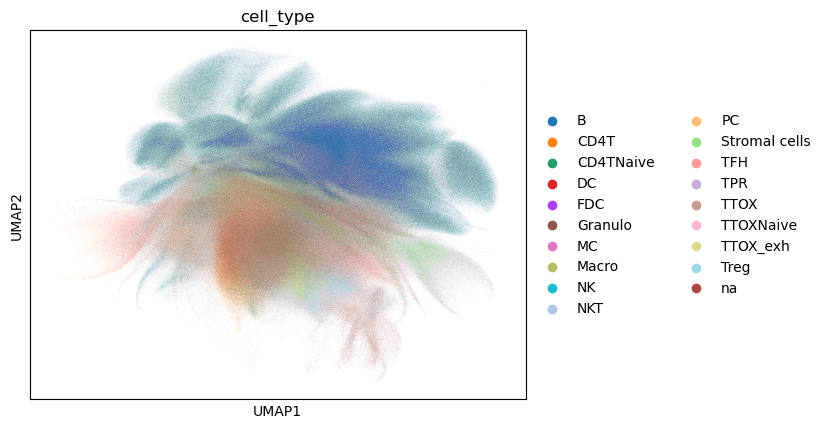

In [18]:
sc.pl.umap(adata, color='cell_type')

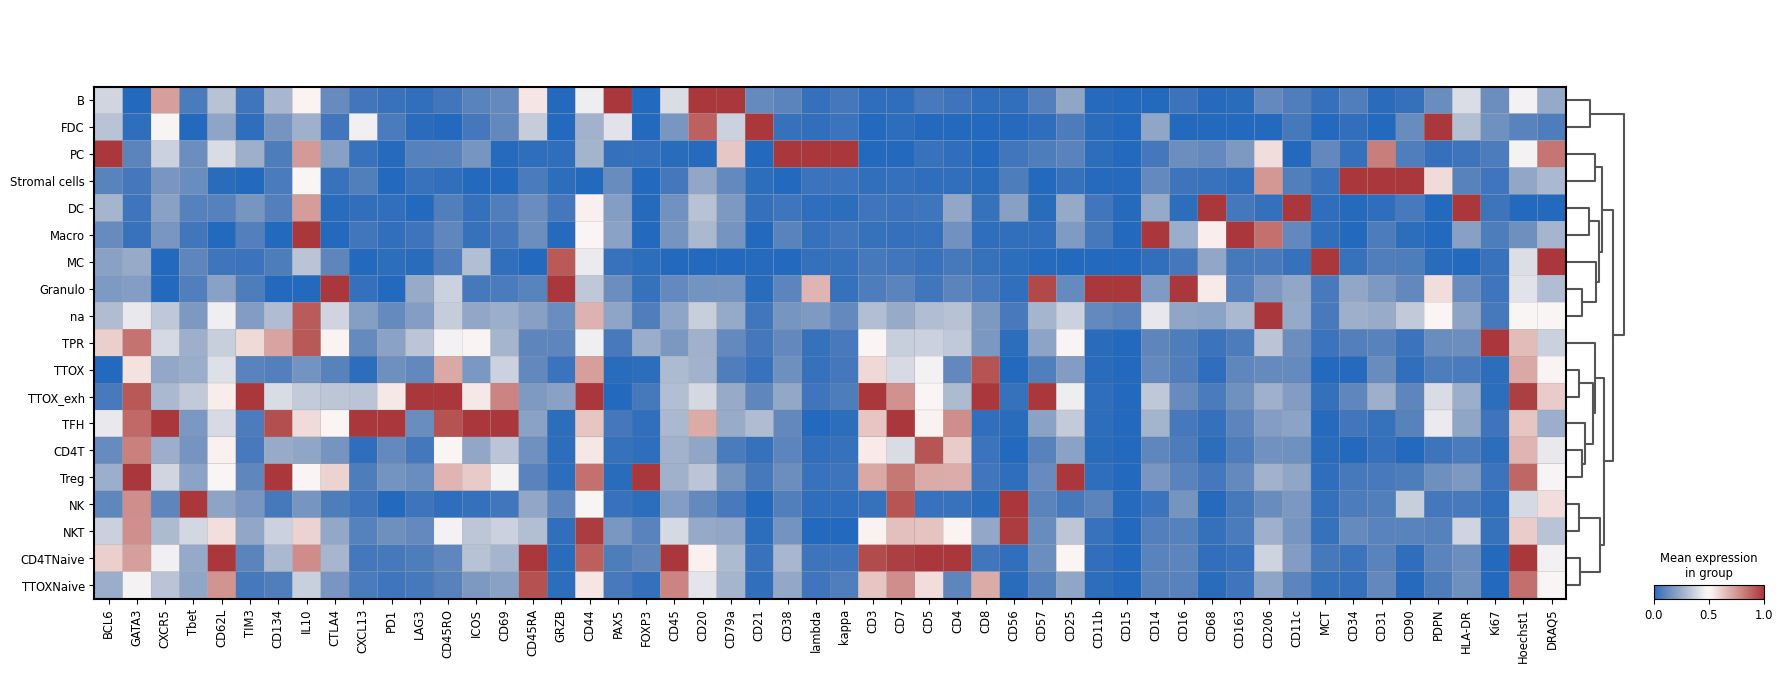

In [22]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, standard_scale='var', layer='zscore')

In [23]:
sc.tl.rank_genes_groups(adata, groupby='cell_type' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_

In [24]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

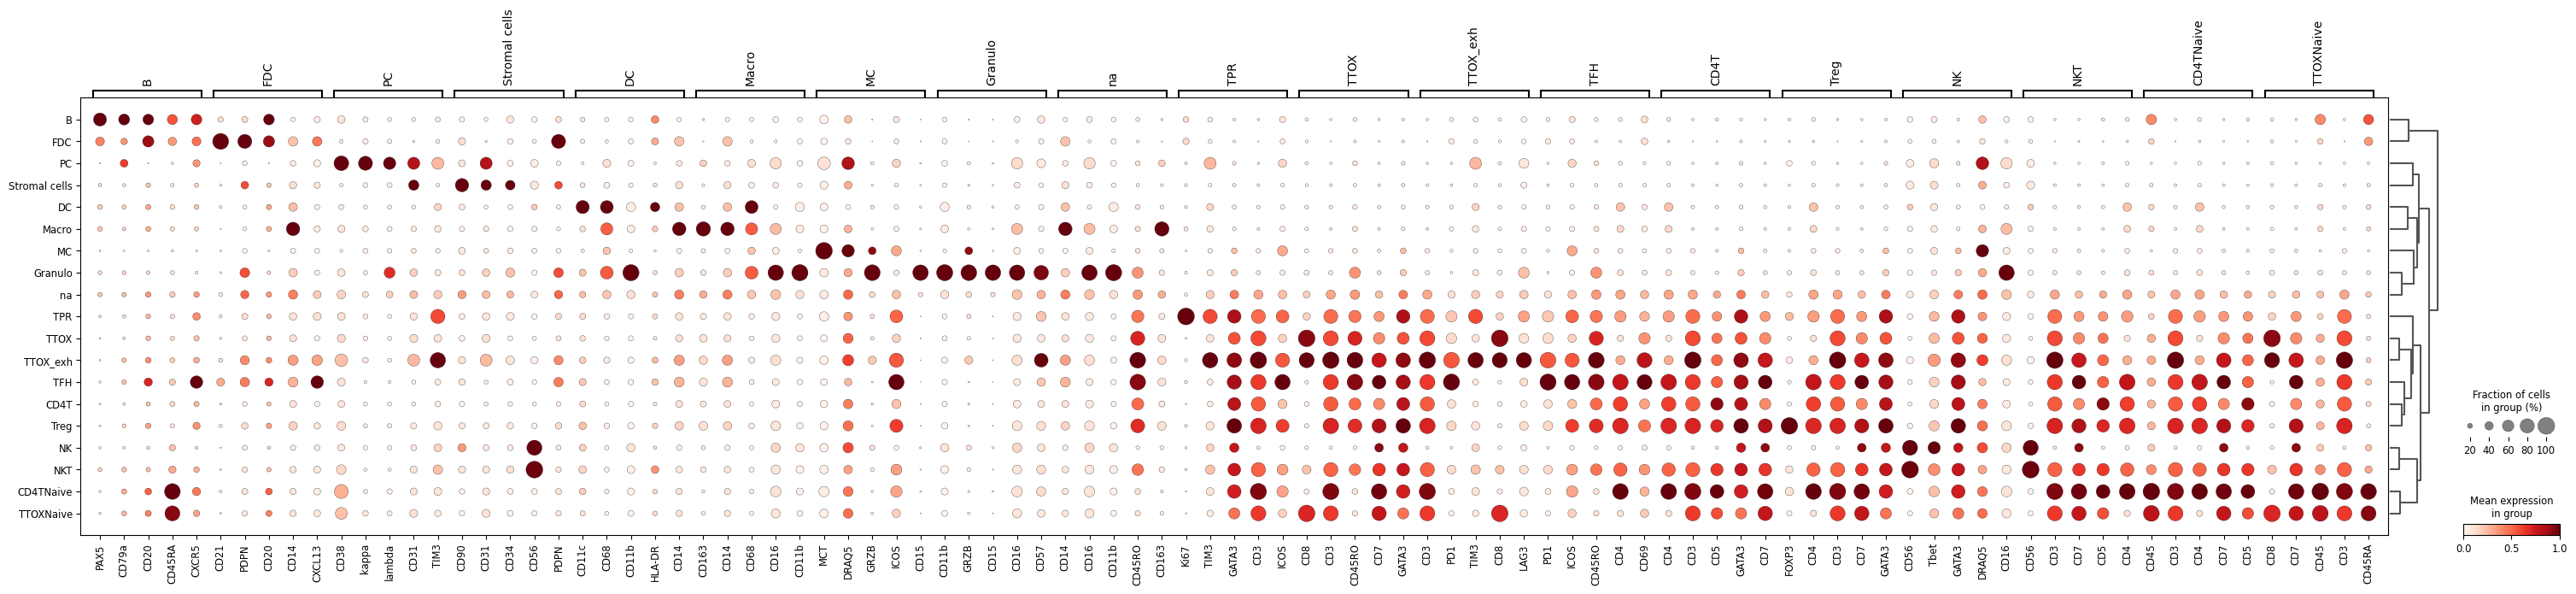

In [26]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')